# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.6,99,1.0
1,2023-01-01T01:00,10.6,98,0.1
2,2023-01-01T02:00,10.4,96,0.0
3,2023-01-01T03:00,9.8,95,0.0
4,2023-01-01T04:00,9.1,95,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [8]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\carlo\AppData\Local\Temp\ipykernel_25224\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [9]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.448214,86.267857,0.136905
std,3.525340,12.804132,0.431063
min,0.500000,45.000000,0.000000
25%,6.050000,81.000000,0.000000
50%,8.400000,90.000000,0.000000
75%,11.200000,97.000000,0.000000
max,18.000000,100.000000,3.100000


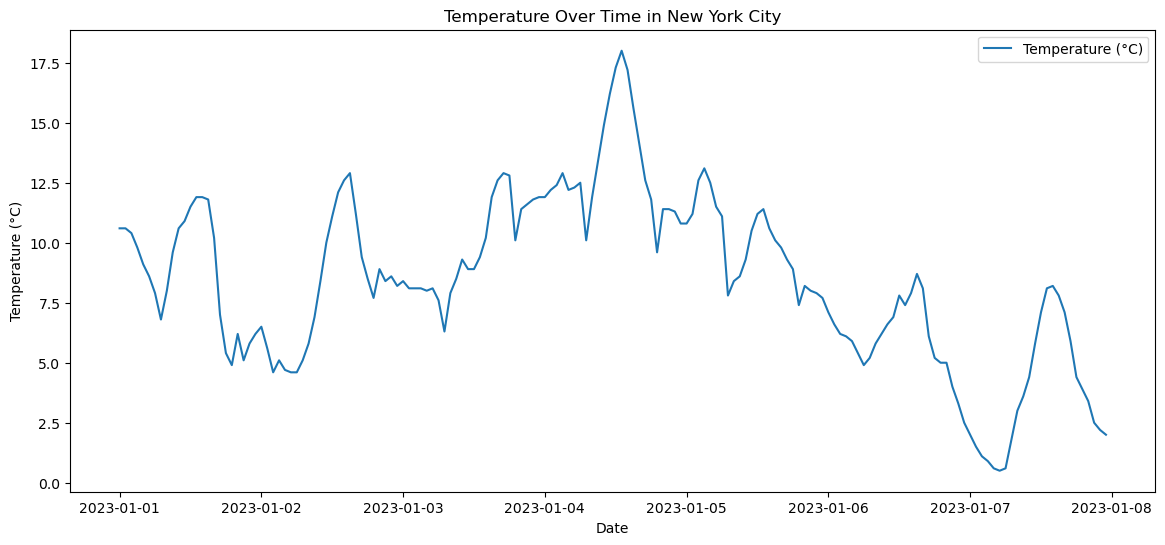

In [10]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

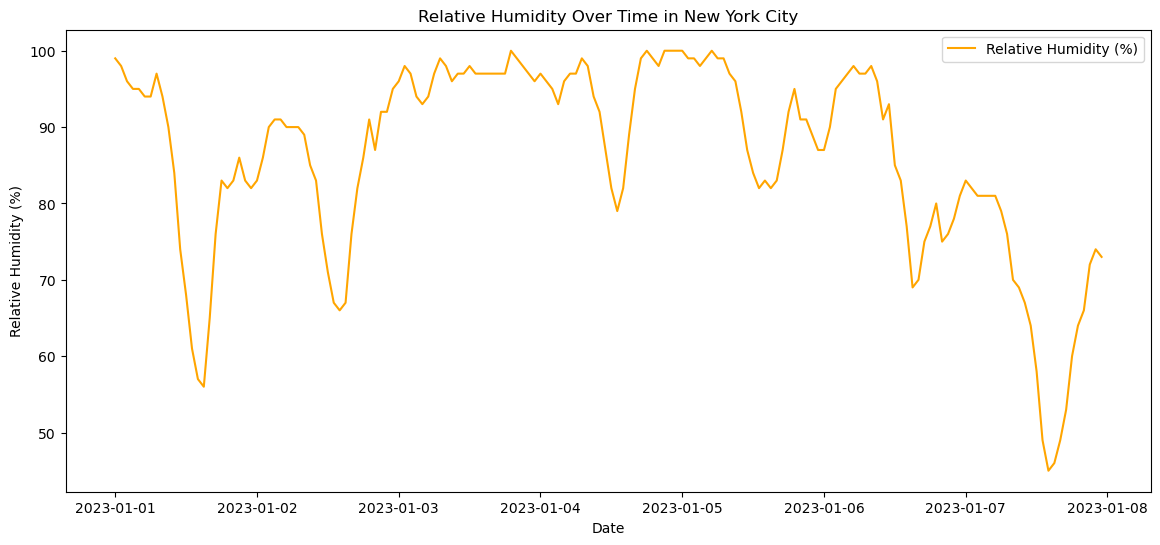

In [11]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


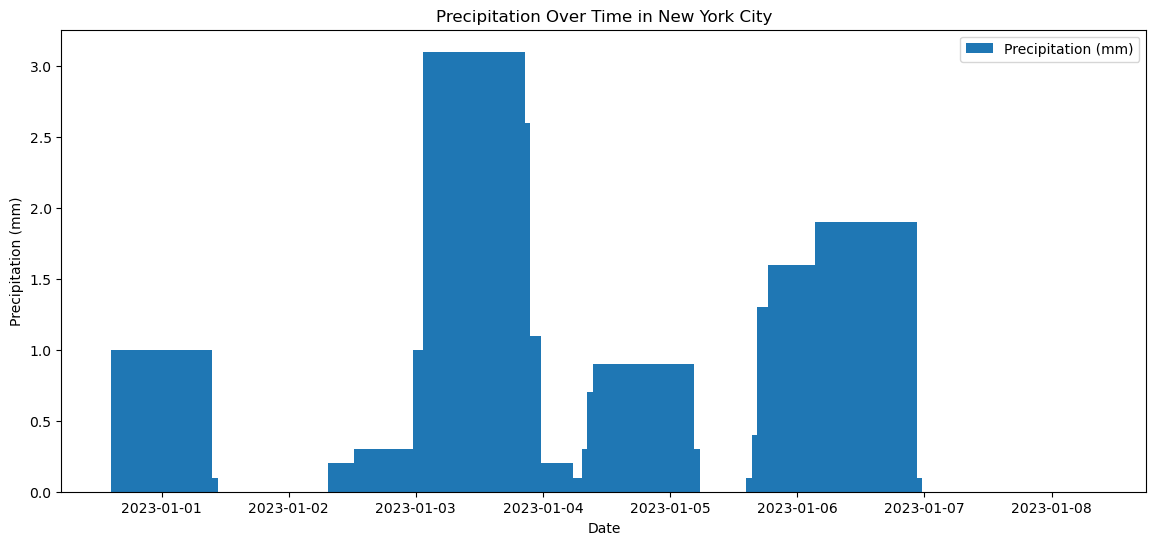

In [12]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [13]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


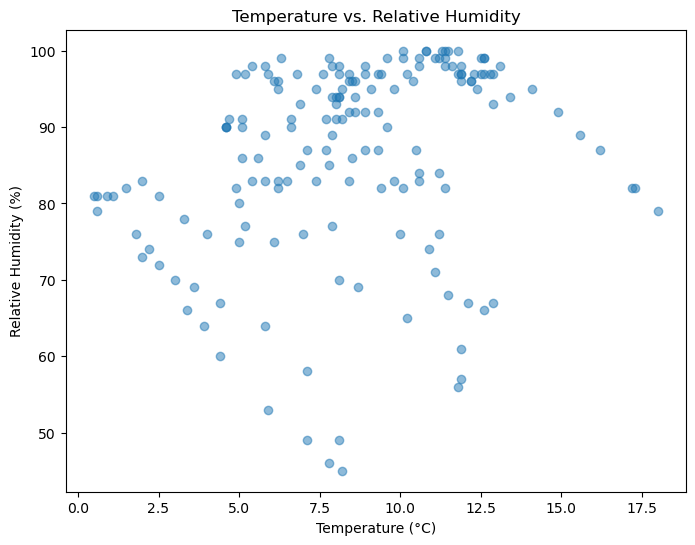

In [14]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [15]:
df.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,10.6,99,1.0
2023-01-01 01:00:00,10.6,98,0.1
2023-01-01 02:00:00,10.4,96,0.0
2023-01-01 03:00:00,9.8,95,0.0
2023-01-01 04:00:00,9.1,95,0.0


In [16]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.783333,83.000000,0.045833
2023-01-02,7.979167,84.000000,0.025000
2023-01-03,9.700000,96.916667,0.391667
2023-01-04,13.083333,94.333333,0.095833
2023-01-05,9.912500,92.125000,0.000000


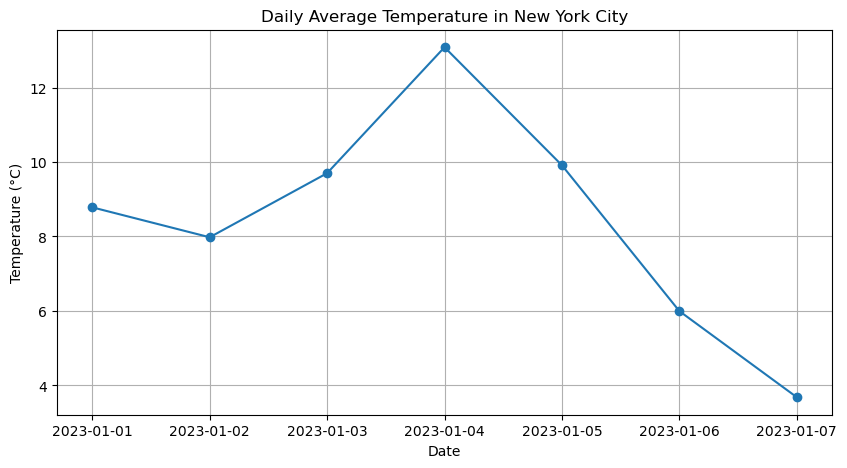

In [17]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [18]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\carlo\AppData\Local\Temp\ipykernel_25224\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [19]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [20]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


In [21]:
combined_temp.head()

,New York,Los Angeles
time,,
2023-01-01,8.783333,12.504167
2023-01-02,7.979167,9.770833
2023-01-03,9.700000,12.245833
2023-01-04,13.083333,14.045833
2023-01-05,9.912500,12.220833


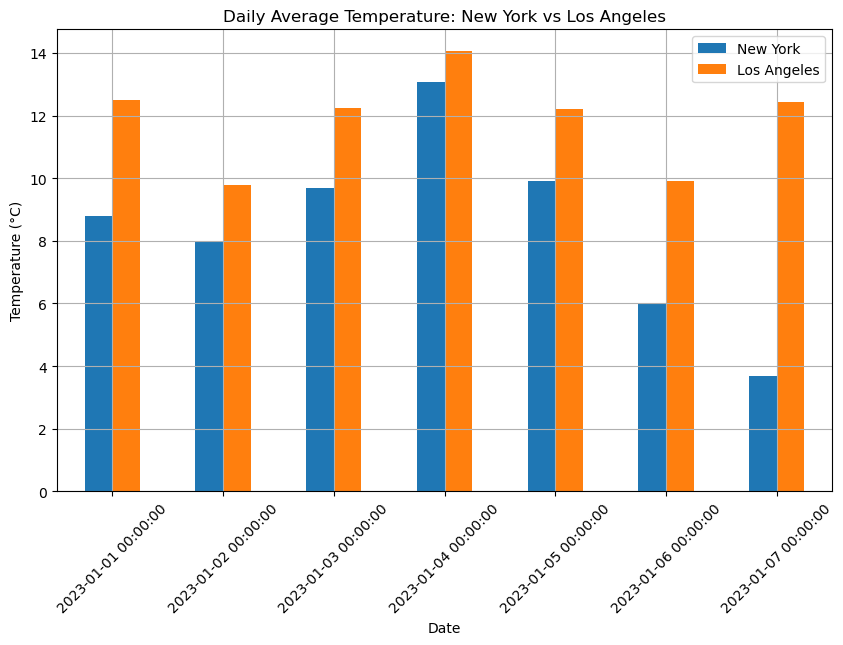

In [22]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.783333,12.504167,3.720833
2023-01-02,7.979167,9.770833,1.791667
2023-01-03,9.700000,12.245833,2.545833
2023-01-04,13.083333,14.045833,0.962500
2023-01-05,9.912500,12.220833,2.308333
2023-01-06,5.995833,9.925000,3.929167
2023-01-07,3.683333,12.429167,8.745833


In [24]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


---

### 1. Fetch Data

In [25]:
# Tuples of coordinates for London and Seattle
london_coords = (51.5074, -0.1278)
seattle_coords = (47.6062, -122.3321)
# Dates for year of 2022
year_2022 = ("2022-01-01", "2022-12-31")
# Hourly variables to pull from API
weather_variables_hourly = ["precipitation"]
# Timezones for London (GMT+0) and Seattle (GMT-8 i.e. PST)
london_timezone = "Europe/London"
seattle_timezone = "America/Los_Angeles"

In [26]:
# Reestablishing base_url
base_url = 'https://archive-api.open-meteo.com/v1/archive'
def om_archive_fetch_hourly(
    hourly_variables: list[str] | None = None,
    coords: tuple[float, float] = (0.0, 0.0), 
    time_interval: tuple[str, str] = ("1940-01-01", "1940-01-01"),
    timezone: str = "gmt"
):
    params = {
        'latitude': coords[0],
        'longitude': coords[1],
        'start_date': time_interval[0],
        'end_date': time_interval[1],
        'timezone': timezone
    }
    if hourly_variables:
        hourly = ",".join(hourly_variables)
        params['hourly'] = hourly
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response
    else:
        raise RuntimeError(f"Fetch failure - Status Code: {label}")
    

In [27]:
london_fetch = om_archive_fetch_hourly(
    hourly_variables = weather_variables_hourly,
    coords = london_coords,
    time_interval = year_2022,
    timezone = london_timezone
)
# Checking out the json out of curiousity
london_fetch.json()

{'latitude': 51.493847,
 'longitude': -0.1630249,
 'generationtime_ms': 0.49567222595214844,
 'utc_offset_seconds': 0,
 'timezone': 'Europe/London',
 'timezone_abbreviation': 'GMT',
 'elevation': 16.0,
 'hourly_units': {'time': 'iso8601', 'precipitation': 'mm'},
 'hourly': {'time': ['2022-01-01T00:00',
   '2022-01-01T01:00',
   '2022-01-01T02:00',
   '2022-01-01T03:00',
   '2022-01-01T04:00',
   '2022-01-01T05:00',
   '2022-01-01T06:00',
   '2022-01-01T07:00',
   '2022-01-01T08:00',
   '2022-01-01T09:00',
   '2022-01-01T10:00',
   '2022-01-01T11:00',
   '2022-01-01T12:00',
   '2022-01-01T13:00',
   '2022-01-01T14:00',
   '2022-01-01T15:00',
   '2022-01-01T16:00',
   '2022-01-01T17:00',
   '2022-01-01T18:00',
   '2022-01-01T19:00',
   '2022-01-01T20:00',
   '2022-01-01T21:00',
   '2022-01-01T22:00',
   '2022-01-01T23:00',
   '2022-01-02T00:00',
   '2022-01-02T01:00',
   '2022-01-02T02:00',
   '2022-01-02T03:00',
   '2022-01-02T04:00',
   '2022-01-02T05:00',
   '2022-01-02T06:00',
   '20

In [28]:
london_rain = pd.DataFrame(london_fetch.json()['hourly'])
london_rain.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [29]:
seattle_fetch = om_archive_fetch_hourly(
    hourly_variables = weather_variables_hourly,
    coords = seattle_coords,
    time_interval = year_2022,
    timezone = seattle_timezone
)
seattle_rain = pd.DataFrame(seattle_fetch.json()['hourly'])
seattle_rain.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


---
### 2. Data Cleaning

In [30]:
null_count = pd.DataFrame({
    "London" : london_rain.isnull().sum(),
    "Seattle" : seattle_rain.isnull().sum()
}).T
null_count

,time,precipitation
London,0,0
Seattle,0,0


No null values, so we'll just change the time column to datetime and reindex.

In [31]:
london_rain['time'] = pd.to_datetime(london_rain['time'])
seattle_rain['time'] = pd.to_datetime(seattle_rain['time'])

london_rain.set_index('time', inplace=True)
seattle_rain.set_index('time', inplace=True)

---
### 3. Resample + Combine

In [32]:
ldn_sea_rain = pd.concat([london_rain, seattle_rain], axis=1, keys=["LDN", "SEA"])
ls_rain_weekly = ldn_sea_rain.resample("W").sum()
ls_rain_weekly.head()

,LDN,SEA
,precipitation,precipitation
time,,
2022-01-02,2.2,38.3
2022-01-09,12.9,101.8
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.4,6.6


---
### 4. Visualization + Analysis

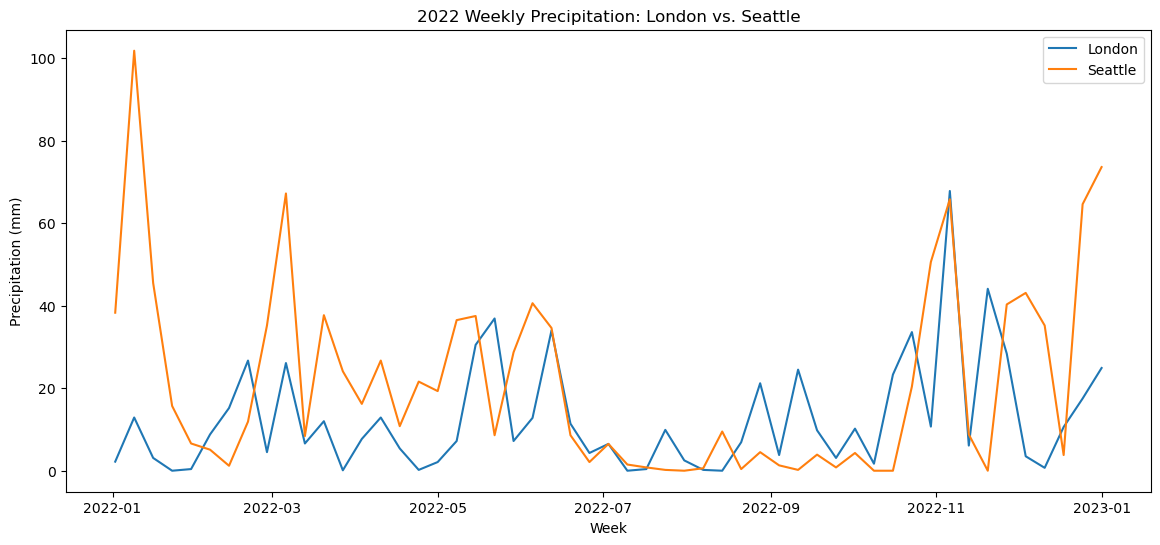

In [33]:
plt.figure(figsize=(14, 6))
plt.plot(ls_rain_weekly.index, ls_rain_weekly['LDN'], label="London")
plt.plot(ls_rain_weekly.index, ls_rain_weekly['SEA'], label="Seattle")
plt.title("2022 Weekly Precipitation: London vs. Seattle")
plt.xlabel("Week")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.show()

From this visualization alone it's pretty obvious which city experiences more precipitation, but just to be concrete, we'll calculate the sums.

In [34]:
ls_rain_weekly.sum()

LDN  precipitation     663.1
SEA  precipitation    1131.2
dtype: float64

Seattle's total precipitation is nearly double of London's. Another interesting detail to pick up on from the line chart is that the "shape" of both lines is almost identical in pattern. That is to say, the peaks and valleys of both lines seem to occur in unison, with Seattle just having more extreme peaks. I'd be willing to guess that the correlation between the two is relatively high.

In [40]:
correlation = ls_rain_weekly[('SEA', 'precipitation')].corr(ls_rain_weekly[('LDN', 'precipitation')])
print(f"Correlation between Seattle and London's precipitation: {correlation:.4f}")

Correlation between Seattle and London's precipitation: 0.2903


In [41]:
from scipy.stats import zscore
ls_rain_weekly[('LDN', "z_score")] = zscore(ls_rain_weekly[('LDN', 'precipitation')])
ls_rain_weekly[('SEA', "z_score")] = zscore(ls_rain_weekly[('SEA', 'precipitation')])
z_corr = ls_rain_weekly[('SEA', 'z_score')].corr(ls_rain_weekly[('LDN', 'z_score')])
print(f"Correlation between Seattle and London's normalized precipitation: {z_corr:.4f}")

Correlation between Seattle and London's normalized precipitation: 0.2903


I suppose not as strong as I initially believed hahaha. It seems that seasonality is shared between the two cities. This is likely due to them being in the same hemisphere. However, even with normalized values, the temporal misalignment between peaks seems to make for a poor Pearson correlation.